In [2]:
import os
os.chdir("../")
print(os.getcwd() )
import re
import json
from sklearn.metrics import jaccard_score
import re

res = []
output_folder = "datasets/pointer_analysis/output_acc"
output_other_folder = "datasets/pointer_analysis/output_others" # chat gpt output wrong formats
os.makedirs(output_other_folder, exist_ok=True)


frama_folder = "datasets/pointer_analysis/frama"
chatgpt_folder = "datasets/pointer_analysis/chatgpt"

# [eva:final-states] Values at end of function
def check_data(frama_folder, chatgpt_folder):
    for fname in os.listdir(frama_folder):
        of = f"{output_folder}/{fname}.sum"
        if not os.path.isfile(of):
            of = f"{output_other_folder}/{fname}.sum"
        else:
            print(of)
            continue
        with open(of, "w") as f:
        # f.write("Chat GPT ************************** \n ")
            fpath = os.path.join(frama_folder, fname)
            d = fname.replace(".c.txt", "")
            answer_md = os.path.join(chatgpt_folder, d, "answer.md")
            code_txt = os.path.join(chatgpt_folder, d, "code.txt")
            try:
                answer_chat = json.load(open(answer_md))
            except:
                continue
            data = open(fpath).readlines()
            code = open(code_txt).read()
            answer_text_chatgpt = open(answer_md).read()
            answer_v = {}
            last_v = ""
            for l in data:
                if l.startswith("[eva:final-states] Values at end of function"):
                    f.write(l)

                if "∈" in l:
                    f.write(l)
                    l = l.strip()
                    cc = l.split("∈")
                    v = cc[0].strip().split()[-1]
                    alphabets = re.findall(r'[a-zA-Z]+', v)
                   # print(alphabets)
                    if len(alphabets) == 0 or v.strip().startswith(".") or v.strip().startswith("["):
                        alphabets = re.findall(r'[a-zA-Z]+', last_v)
                        tmpname = re.sub(r'(\[\d+\])+', "", last_v).strip()
                        v = tmpname+v.strip()
                    else:
                        last_v = v
                    
                    if "or" in cc[1]:
                        cc[1] = cc[1].split("or")[0]
                    # Use regular expression to extract only alphabets
                    alphabets = re.findall(r'[a-zA-Z]+', cc[1])
                    answer_v[v] = alphabets
            f.write(" \n  ************************** ChatGPT  ************************** \n ")    
            f.write(answer_text_chatgpt)    
            f.write(" \n ************************** Frama-c ************************** \n ")    
            if "__retres" in answer_v:
                del answer_v["__retres"]
            answer_v =  json.dumps(answer_v, indent=4 )
            f.write(answer_v)
            f.write(" \n \n Code ************************** \n ")  
            f.write(code)    
           # print(fname)
           # print(answer_v)    


In [8]:
import numpy as np
def are_dicts_equal(dict1, dict2):
    """Checks if two dictionaries are equal"""
    if len(dict1) != len(dict2):
        return False

    for key, value in dict1.items():
        if key not in dict2 or set(dict2[key]) != set(value):
            return False

    return True

def jaccard_similarity(a, b):
    # convert to set
    a = set(a)
    b = set(b)
    # calucate jaccard similarity
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j

def are_vars_equal(framac, chatdict):
    total = 0
    hit = 0
    score_list = []
    for v in framac:
        vars = framac[v]
        if v in chatdict:
            cvars = chatdict[v]
            if set(vars) == set(cvars):
                hit += 1
            # print(set(vars))
            # print(set(cvars))
            score = jaccard_similarity(set(vars), set(cvars))
            score_list.append(score)
            total += 1
    return hit, total, score_list


exact_matched = 0
total_number = 0
total_hits = 0
total_vars = 0
score_list = []
program_score_list = []
res = []
output_folder = "datasets/pointer_analysis/output_acc"
for fname in os.listdir(output_folder):
    fpath = os.path.join(output_folder, fname)
    print(fpath)
    with open(fpath, "r") as f:
        content = f.read()
        lines = content.split("\n")
        if len(lines) <= 1:
            continue
        chat_start_lines = -1
        chat_end_lines = -1
        frama_start_lines = -1
        frama_end_lines = -1
        for i, line in enumerate(lines):
            if "ChatGPT" in line:
                chat_start_lines = i + 1
            if "Frama-c" in line:
                frama_start_lines = i + 1
                chat_end_lines = i
            if "Code **" in line:
                frama_end_lines = i
        #print(" ".join(lines[chat_start_lines:chat_end_lines]))
        chat_data = json.loads(" ".join(lines[chat_start_lines:chat_end_lines]) )
        #print(" ".join(lines[frama_start_lines:frama_end_lines]) )
        frama_data = json.loads(" ".join(lines[frama_start_lines:frama_end_lines]) )
        # exact match
        if are_dicts_equal(frama_data, chat_data):
            exact_matched += 1
        total_number += 1
        hit, tv , ls = are_vars_equal(frama_data, chat_data)
        if len(ls) != 0:
            total_hits += hit
            total_vars += tv
            score_list += ls
            if np.isnan(np.mean(ls)):
                print(ls)
            program_score_list.append(np.mean(ls))
        


datasets/pointer_analysis/output_acc/array2.c.txt.sum
datasets/pointer_analysis/output_acc/ben1.c.txt.sum
datasets/pointer_analysis/output_acc/ben11.c.txt.sum
datasets/pointer_analysis/output_acc/ben12.c.txt.sum
datasets/pointer_analysis/output_acc/ben2.c.txt.sum
datasets/pointer_analysis/output_acc/ben3.c.txt.sum
datasets/pointer_analysis/output_acc/ben5.c.txt.sum
datasets/pointer_analysis/output_acc/ben7.c.txt.sum
datasets/pointer_analysis/output_acc/swap-struct.c.txt.sum
datasets/pointer_analysis/output_acc/swap-struct1.c.txt.sum
datasets/pointer_analysis/output_acc/swap.c.txt.sum
datasets/pointer_analysis/output_acc/swap1.c.txt.sum
datasets/pointer_analysis/output_acc/swap4-context.c.txt.sum
datasets/pointer_analysis/output_acc/swap4-context1.c.txt.sum
datasets/pointer_analysis/output_acc/swap4.c.txt.sum
datasets/pointer_analysis/output_acc/test-recursiveglobal2.c.txt.sum
datasets/pointer_analysis/output_acc/test1.c.txt.sum
datasets/pointer_analysis/output_acc/cond-swap.c.txt.sum
d

In [9]:
#check_data(frama_folder, chatgpt_folder)
print(exact_matched)
print(total_number)
#  

3
40


In [4]:
print(total_hits)
print(total_vars)
print(43/133)
# 43/133 ， 

43
133
0.3233082706766917


[0.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.0, 0.0, 0.0, 0.75, 0.625, 0.75, 0.75, 0.5, 0.8333333333333334, 0.75, 0.5, 0.16666666666666666, 0.26666666666666666, 0.2, 0.6, 0.5, 0.6428571428571429, 0.3333333333333333, 0.6428571428571429, 0.0, 0.6, 0.6, 0.6, 0.0, 0.5, 0.0, 0.75, 0.75, 0.5]


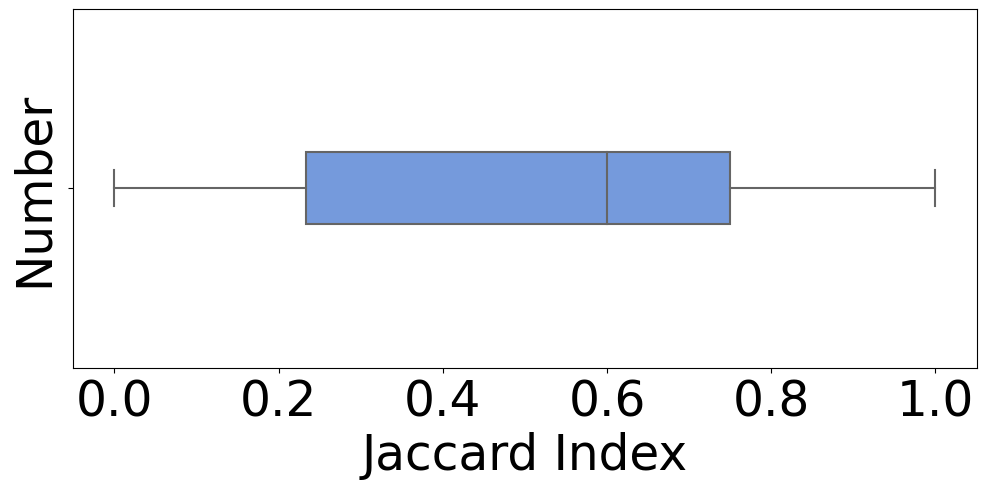

In [5]:
print(program_score_list)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
import seaborn as sns
sns.boxplot(x=program_score_list, width=0.2, color="cornflowerblue")
plt.xticks(rotation=0, fontsize=35)
plt.yticks(fontsize=20)
plt.xlabel('Jaccard Index', fontsize=35)
plt.ylabel('Number', fontsize=35)
plt.tight_layout()
plt.savefig('datasets/figures/pointers/jacard_program.pdf')

In [6]:

print(np.mean(score_list))

0.49122807017543857


In [7]:
print(score_list)


[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.0, 0.0, 1.0, 1.0, 0.5, 0.0, 0.0, 0.5, 0.5, 0.3333333333333333, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.5, 1.0, 1.0, 0.0, 0.0]


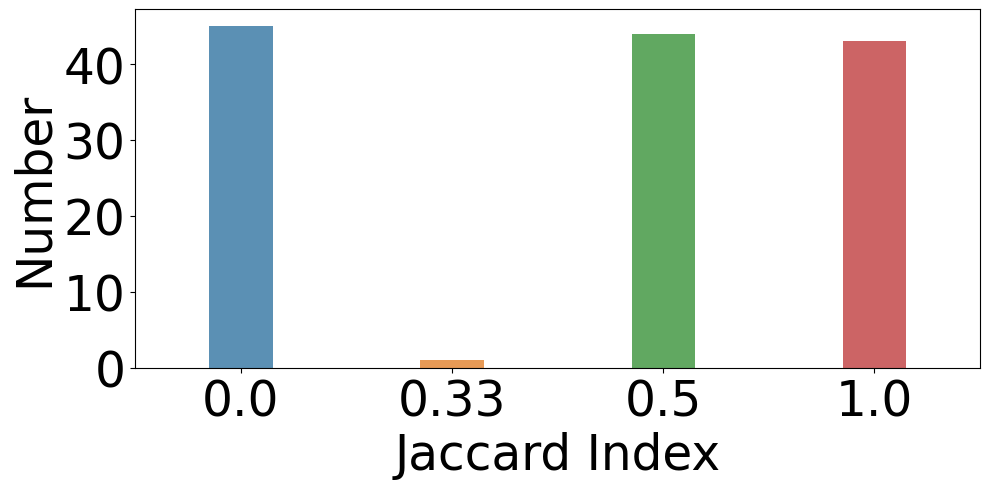

In [8]:
score_list = [ float("{:.2f}".format(x)) for x in score_list ]
plt.figure(figsize=(10,5))
sns.countplot(x=score_list, width=0.3, alpha=0.8)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel('Jaccard Index', fontsize=35)
plt.ylabel('Number', fontsize=35)
plt.tight_layout()
plt.savefig('datasets/figures/pointers/jacard.pdf')

In [9]:
#  
#  variable  jaccard_score
# 
#    - pointer type 
# 